In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [4]:
import pytorch_optimizer as optim

In [5]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [6]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [7]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [8]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [9]:
len(y_train), len(y_test)

(50000, 10000)

In [10]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [11]:
X_train /= 255.
X_test /= 255.

In [12]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

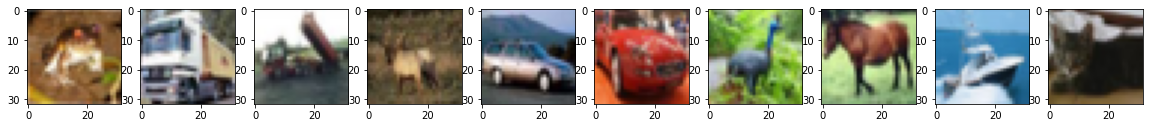

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [14]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [15]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [16]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [31]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=1.0e-3)
    optimizer = optim.YogiPNM(net.parameters(), lr=1.0e-3)
    
    batch_size = 500

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        
        if epoch == 15:
            print("lr=1.0e-4")
            #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)
            #optimizer = optim.PNMBelief(net.parameters(), lr=1.0e-4)
            optimizer = optim.YogiPNM(net.parameters(), lr=1.0e-4)
        
        if epoch == 25:
            print("lr=0.3e-4")
            #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)
            #optimizer = optim.PNMBelief(net.parameters(), lr=0.3e-4)
            optimizer = optim.YogiPNM(net.parameters(), lr=0.3e-4)


        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history



In [25]:
accuracies = {}
losses = {}

In [32]:
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

In [33]:
accuracies['resnet50+YogiPNM'], losses['resnet50+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.7271999716758728



epoch  1


100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


accuracy =  0.8111000061035156



epoch  2


100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


accuracy =  0.8175999522209167



epoch  3


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8251999616622925



epoch  4


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.824400007724762



epoch  5


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8300999999046326



epoch  6


100%|██████████| 100/100 [00:22<00:00,  4.40it/s]


accuracy =  0.8346999883651733



epoch  7


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.8395999670028687



epoch  8


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8410999774932861



epoch  9


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.8351999521255493



epoch  10


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8393999934196472



epoch  11


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8464999794960022



epoch  12


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8479999899864197



epoch  13


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8473999500274658



epoch  14


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8503999710083008



epoch  15
lr=1.0e-4


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8575999736785889



epoch  16


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8596999645233154



epoch  17


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.857699990272522



epoch  18


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


accuracy =  0.8589999675750732



epoch  19


100%|██████████| 100/100 [00:22<00:00,  4.35it/s]


accuracy =  0.8578000068664551



epoch  20


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8596000075340271



epoch  21


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8578000068664551



epoch  22


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8593999743461609



epoch  23


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8605999946594238



epoch  24


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.8608999848365784



epoch  25
lr=0.3e-4


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8601999878883362



epoch  26


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


accuracy =  0.8574000000953674



epoch  27


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


accuracy =  0.8588999509811401



epoch  28


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


accuracy =  0.858299970626831



epoch  29


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


accuracy =  0.8585000038146973





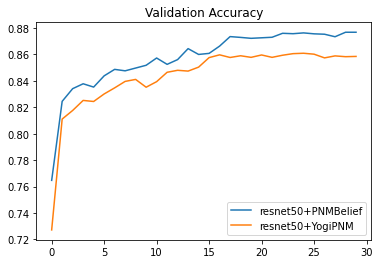

In [34]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

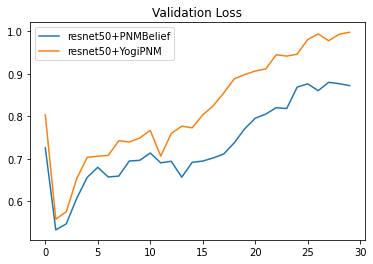

In [35]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [21]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [23]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [24]:
D # resnet18+PNMBelief

,0,1,2,3,4,5,6,7,8,9
0,879,12,42,15,14,12,8,11,34,19
1,12,906,5,8,2,1,4,2,16,43
2,24,6,793,55,35,39,27,11,7,4
3,14,3,23,635,35,103,19,21,8,6
4,9,0,47,53,838,30,34,28,1,2
5,1,2,28,151,20,753,12,29,2,2
6,3,5,33,39,12,15,888,3,3,3
7,14,3,20,26,30,34,3,882,1,7
8,29,10,5,9,11,4,3,4,917,13
9,15,53,4,9,3,9,2,9,11,901


In [ ]:
D # resnet18

,0,1,2,3,4,5,6,7,8,9
0,878,16,36,22,4,8,8,5,33,15
1,10,905,1,6,1,2,3,3,11,45
2,20,0,817,43,37,32,27,16,11,8
3,9,5,32,693,45,138,49,32,7,8
4,9,1,40,44,822,27,28,18,1,3
5,9,5,33,124,32,746,11,48,3,1
6,4,4,22,27,21,10,867,4,3,3
7,7,1,14,26,30,30,2,861,1,6
8,36,18,3,7,6,3,3,4,916,28
9,18,45,2,8,2,4,2,9,14,883
